# Machine Learning 109 fall Hw1 

### 可藉由 input()輸入一個一元三次方程式$y=ax^3+bx^2+cx+d$之係數𝑎, 𝑏, 𝑐, 𝑑。係數可以是正負的實數。
係數的輸入格式有誤，或係數個數不對，都應跳出錯誤訊息，要求重新輸入。譬如輸入 3, -2, 4 或 2, -3, aa, -7 都將視為輸入錯誤。

In [57]:
while True :
    try : 
        a, b, c, d = input( "Input the coefficient of a third-order equation: (format a, b, c, d)" ).split( "," )
        a, b, c, d = float( a ), float( b ), float( c ), float( d )
        # coefs = input( "Input the coordinates: (format a, b, c, d.......)" ).split( "," )
        # coefs = [float( x ) for x in coefs]  # using in list, dict
        coefs = a, b, c, d
        break
    except Exception as error :
        print( error )
# 0, -1, 10, -23

Input the coefficient of a third-order equation: (format a, b, c, d)1
not enough values to unpack (expected 4, got 1)
Input the coefficient of a third-order equation: (format a, b, c, d)1,a,b,
could not convert string to float: 'a'
Input the coefficient of a third-order equation: (format a, b, c, d)1, a, c,3
could not convert string to float: ' a'
Input the coefficient of a third-order equation: (format a, b, c, d)0, -1, 10, -23


In [58]:
print( 'y =', coefs[0], 'x^3 +', coefs[1], 'x^2 +', coefs[2], 'x +', coefs[3] )

y = 0.0 x^3 + -1.0 x^2 + 10.0 x + -23.0


### 將該方程式所代表之曲線以紫色繪製出來

In [59]:
import matplotlib.pyplot as plt
import numpy as np

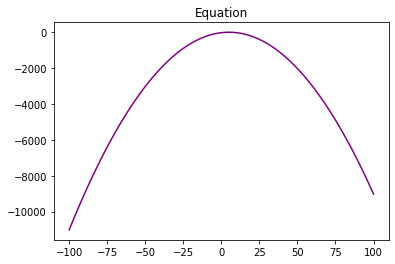

In [60]:
x = np.linspace( -100, 100, 100 )
y = coefs[0]*x**3+coefs[1]*x**2+coefs[2]*x+coefs[3]
plt.figure()
plt.title('Equation') 
plt.plot( x, y, color = 'purple' )
plt.show()

### 可再藉由 input()要求輸入任意點數的座標。其中每兩個值代表一個點的 x, y 座標。

In [61]:
while True :
    spot = input( "Input the coordinates: (format a, b, c, d.......)" ).split( "," )
    spot = [float( x ) for x in spot]  # using in list, dict
    if len( spot )%2 == 1 :
        print( 'points error, please enter again' )
    else :
        break
# 0, -23, 20, -223, -25, -4000, -75, -2000, 50, -1000, 30, -6000

Input the coordinates: (format a, b, c, d.......)1
points error, please enter again
Input the coordinates: (format a, b, c, d.......)1,2,3
points error, please enter again
Input the coordinates: (format a, b, c, d.......)0, -23, 20, -223, -25, -4000, -75, -2000, 50, -1000, 30, -6000


In [62]:
spot = [spot[i:i+2] for i in range( 0, len( spot ), 2 )]
# spot = np.asarray( spot ).reshape( 2,int( len( spot )/2 ) )
# bind 2 values as a point

In [63]:
xSpot = [spot[i][0] for i in range( 0, len( spot ) )]
xMax, xMin = max( xSpot ), min( xSpot )
# find the maximun of coordinate "x"

### 輸入的點若位於曲線$y=ax^3+bx^2+cx+d$之上的請以紅色點標示、線以下的畫成藍色、在線上的畫成綠色。

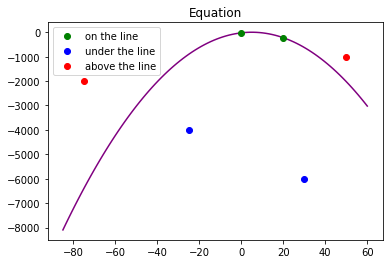

In [83]:
x = np.linspace( xMin-10, xMax+10, 100 )
# scale the window from x min-10 to x max+10
y = coefs[0]*x**3+coefs[1]*x**2+coefs[2]*x+coefs[3]
r, b, g = 0, 0, 0
plt.figure()
plt.title('Equation') 
plt.plot( x, y, color = 'purple' )
for i in range( len( spot ) ) :
    yPoint = coefs[0]*spot[i][0]**3+coefs[1]*spot[i][0]**2+coefs[2]*spot[i][0]+coefs[3]
    if yPoint < spot[i][1] :
        plt.plot( spot[i][0], spot[i][1], 'ro' ) if r else plt.plot( spot[i][0], spot[i][1], 'ro', label = 'above the line' )
        r = 1
    elif yPoint > spot[i][1] :
        plt.plot( spot[i][0], spot[i][1], 'bo' ) if b else plt.plot( spot[i][0], spot[i][1], 'bo', label = 'under the line' )
        b = 1
    else :
        plt.plot( spot[i][0], spot[i][1], 'go' ) if g else plt.plot( spot[i][0], spot[i][1], 'go', label = 'on the line' )
        g = 1
plt.legend()
plt.show()

In [65]:
def Equ_cal( x, coefs ) :
    return coefs[0]*x**3+coefs[1]*x**2+coefs[2]*x+coefs[3]
def Diff_equ( x, coefs ) :
    return 3*coefs[0]*x**2 + 2*coefs[1]*x + 1*coefs[2]

### 利用底下遞迴方式找出該方程式在 x=0 到 10 之間 y 的最大值

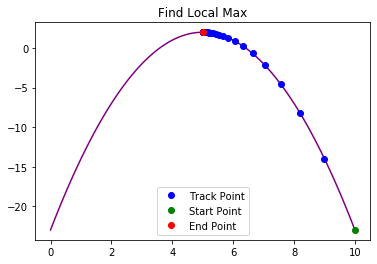

In [66]:
import random
x = np.linspace( 0, 10, 100 )
# scale the window from x min-10 to x max+10
y = coefs[0]*x**3+coefs[1]*x**2+coefs[2]*x+coefs[3]
plt.figure()
plt.title("Find Local Max") 
plt.plot( x, y, color = 'purple' )

max_iteration = 1000
learningRate = 0.1
epsilon = 0.0001
xCur = random.randint( 0, 10 )
xStart = xCur
yCur = Equ_cal( xCur, coefs )
for k in range( max_iteration ) :
    xCur += learningRate*Diff_equ( xCur, coefs )
    yCur = Equ_cal( xCur, coefs )
    # find local max
    if abs( Diff_equ( xCur, coefs ) ) < epsilon :
        break
    elif xCur <= 0 :
        xCur = 0
        yCur = Equ_cal( xCur, coefs )
        break
    elif xCur >= 10 :
        xCur = 10
        yCur = Equ_cal( xCur, coefs )
        break
    else :
        plt.plot( xCur, yCur, 'bo' )     # Track point
plt.plot( xCur, yCur, 'bo', label = 'Track Point' )
plt.plot( xStart, Equ_cal( xStart, coefs ), 'go', label = 'Start Point' )
plt.plot( xCur, yCur, 'ro', label = 'End Point' )
plt.legend()
plt.show()

### 利用底下遞迴方式找出該方程式在 x=0 到 10 之間 y 的最小值

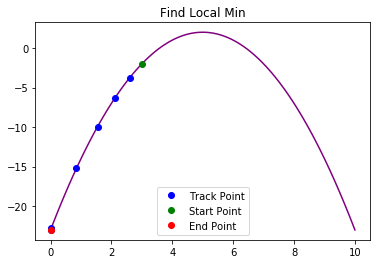

In [69]:
import random
x = np.linspace( 0, 10, 100 )
# scale the window from x min-10 to x max+10
y = coefs[0]*x**3+coefs[1]*x**2+coefs[2]*x+coefs[3]
plt.figure()
plt.title("Find Local Min") 
plt.plot( x, y, color = 'purple' )

max_iteration = 1000
learningRate = 0.1
epsilon = 0.0001
xCur = random.randint( 0, 10 )
xStart = xCur
yCur = Equ_cal( xCur, coefs )
for k in range( max_iteration ) :
    xCur -= learningRate*Diff_equ( xCur, coefs )
    yCur = Equ_cal( xCur, coefs )
    # find local max
    if abs( Diff_equ( xCur, coefs ) ) < epsilon :
        break
    elif xCur <= 0 :
        xCur = 0
        yCur = Equ_cal( xCur, coefs )
        break
    elif xCur >= 10 :
        xCur = 10
        yCur = Equ_cal( xCur, coefs )
        break
    else :
        plt.plot( xCur, yCur, 'bo' )     # Track point
plt.plot( xCur, yCur, 'bo', label = 'Track Point' )
plt.plot( xStart, Equ_cal( xStart, coefs ), 'go', label = 'Start Point' )
plt.plot( xCur, yCur, 'ro', label = 'End Point' )
plt.legend()
plt.show()